In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df=pd.read_csv("C:/Users/dell/Desktop/ML/Salary.csv")

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [10]:
df.isnull().sum() # Checking for null values

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.shape # Checking the number of rows and columns

(35, 2)

In [7]:
# Check if the input is normal

df.YearsExperience.skew() # Since the skew is less than 0.5, we can say that the input is normal

0.4201633652828161

Since there is only one input feature, we need not check for Multicollinearity. I will not be scaling the model as input data is really small and won't require intensive computation

In [9]:
x=df.YearsExperience
y=df.Salary

# Building the base model and checking the characteristics:

x_const=sm.add_constant(x)

lr_model=sm.OLS(y,x_const).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     914.3
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           1.23e-25
Time:                        20:11:28   Log-Likelihood:                -353.66
No. Observations:                  35   AIC:                             711.3
Df Residuals:                      33   BIC:                             714.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.886e+04   2092.797     13.790      0.000    2.46e+04    3.31e+04
YearsExperience  8731.9410    288.783     30.237      0.000    8144.407    9319.475
==============================================================================
Omnibus:                        1.704   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.498
Skew:                           0.372   Prob(JB):                        0.473
Kurtosis:                       2.313   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
The base model is 96.5% accurate from the R2 value. Also, from the report we understand that the residue is normal,
there is very little autocorrelation, no multicollinearity.

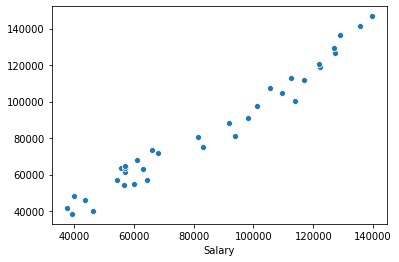

In [12]:
# Linearity Check:

sns.scatterplot(y,lr_model.predict())
plt.show()

In [13]:
# Homoscadacity check:

from statsmodels.stats.api import het_goldfeldquandt

het_goldfeldquandt(lr_model.resid,lr_model.model.exog) # DATA IS HOMOSCADASTIC AS THE PVALUE IS GREATER THAN 0.05

(0.6743377797521596, 0.7743756504762478, 'increasing')

##### All the Assumptions of Linear Regression is satisfied. Now lets try tuning the model

In [50]:
rid=Ridge()

params={"alpha":np.logspace(-5,300,100)}

grid=GridSearchCV(rid,params,cv=5,scoring="neg_mean_squared_error")

grid.fit(np.array(x).reshape(-1, 1),y)

grid.best_params_

{'alpha': 14.508287784959402}

In [34]:
grid.best_score_

-48049359.57882337

In [51]:
rid=Ridge(alpha=14.5082877)

rid_model=rid.fit(np.array(x).reshape(-1, 1),y)

print("R2 score is : ",r2_score(y,rid_model.predict(np.array(x).reshape(-1, 1))))

R2 score is :  0.9642020206846742


In [56]:
las=Lasso()

params={"alpha":np.logspace(-5,300,100)}

grid=GridSearchCV(las,params,cv=5,scoring="neg_mean_squared_error")

grid.fit(np.array(x).reshape(-1, 1),y)

grid.best_params_

{'alpha': 14.508287784959402}

In [57]:
grid.best_score_

-56261291.67956917

In [58]:
las=Lasso(alpha=14.50828778)

las_model=las.fit(np.array(x).reshape(-1, 1),y)

print("R2 score is : ",r2_score(y,las_model.predict(np.array(x).reshape(-1, 1))))

R2 score is :  0.9651632942078282


In [65]:
enet=ElasticNet(max_iter=5000)

params={"alpha":np.logspace(-5,300,10),"l1_ratio":np.linspace(0.01,2,10)}

grid=GridSearchCV(enet,params,cv=5,scoring="neg_mean_squared_error")

grid.fit(np.array(x).reshape(-1, 1),y)

grid.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.01}

In [66]:
enet=ElasticNet(alpha=0.00005,l1_ratio=0.01)

enet_model=enet.fit(np.array(x).reshape(-1, 1),y)

print("R2 score is : ",r2_score(y,enet_model.predict(np.array(x).reshape(-1, 1))))

R2 score is :  0.9651633106605286


In [ ]:
No significant improvement in accuracy. The base model is good enough for prediction of the salary